# Data Mining: Classification Analysis, K-Nearest Neighbors (KNN)
## Jessica Schmidt

# PART I: Research Question
## A1. Research Question and Classification Method
Is it possible to predict the incidence of high blood pressure using the k-nearest neighbor's method so the insitution can apply the appropriate preventive and/or treatment measures to best serve at-risk patients?


## A2. Goal of the Analysis
The primary goal of this analysis is to develop a machine learning model using k-nearest neighbors (KNN) to help the institution identify patients who are at risk for high blood pressure.

# PART II: Method Justification
## B1. Explanation of KNN Classification Method and Expected Outcomes
KNN standardly uses the Euclidean distance to predict the label of any given data point by looking at the "k" (closest labeled data point). For example, to predict the unknown data point's label, the five closest labeled data points are taken, and the new data point is assigned the label of the majority of the "k" closest data points.

The expected outcomes are that I will create an algorithm that has at least 90% accuracy without fitting issues, and that the test data will be classified according to the closest neighbors (Source: Harrison).

## B2. Assumption of the Classification Method (Source: D209 Cohort)
An assumption of the KNN classification method is that similar things are in proximity to each other; i.e., if a data point is far away from another group, it is dissimilar to those data points.

## B3. How Each Python Package/Library Supports the Analysis
- Pandas is used to import data into dataframe and for data manipulations.
- NumPy provides array objects for calculations.
- Seaborn and Matplotlib are used for visualizations. Seaborn is used for things like the correlation matrix whereas Matplotlib is used for things like the ROC curve.
- SciPy is used for the VIF function to see which features have excess multicolinnearity, and for the mosaic function for bivariate analyses.
- Scikit-learn is used for many things: namely, feature selection, scaling features, splitting data into train and test sets, and for the pipeline feature to assemble several steps that can be performed together while setting diffefrent parameters.

In [1]:
# Importing relevant packages

# Standard imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy imports
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
# Import CSV file
df = pd.read_csv('/Users/astro/Downloads/medical_clean.csv')

# Examine the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Print the header
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# PART III: Data Preparation
## C1. KNN Classification Method-Relevant Data Preprocessing Goal
For KNN, and for general data preparation purposes, I will need to check for and address duplicates, check for and impute any missing values, address outliers, re-expression of categorical variables, and scale/standardize the data.

## C2. Initial Dataset Variables for Analysis
1. Numeric: Age
2. Numeric: Doctor Visits
3. Numeric: Vitamin D Levels
4. Numeric: Vitamin D Supplements
5. Numeric: Full Meals Eaten

6. Categorical: High Blood Pressure (Target/Dependent Variable)
7. Categorical: Overweight
8. Categorical: Anxiety
9. Categorical: Reflux Esophagitis
10. Categorical: Back Pain
11. Categorical: Hyperlipidemia
12. Categorical: Stroke
12. Categorical: Arthritis

## C3. Each Step to Prepare Data

### Detecting Duplicates (Source: D206 Webinars)

In [4]:
# No Duplicates Detected
df.duplicated()
print(df.duplicated().value_counts())

False    10000
dtype: int64


### Detecting Missingness (Source: D206 Webinars)

In [5]:
# No Missing Values Detected
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

### Detecting Outliers (Source: D206 Webinars)

In [6]:
# Detecting outliers for Age variable
# No outliers present
df['z_score_age']=stats.zscore(df['Age'])
df[['Age','z_score_age']].head

<bound method NDFrame.head of       Age  z_score_age
0      53    -0.024795
1      51    -0.121706
2      53    -0.024795
3      78     1.186592
4      22    -1.526914
...   ...          ...
9995   25    -1.381548
9996   87     1.622691
9997   45    -0.412438
9998   43    -0.509349
9999   70     0.798948

[10000 rows x 2 columns]>

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([-1.72073600e+00, -1.37670219e+00, -1.03266837e+00, -6.88634559e-01,
        -3.44600744e-01, -5.66928963e-04,  3.43466886e-01,  6.87500701e-01,
         1.03153452e+00,  1.37556833e+00,  1.71960215e+00]),
 <BarContainer object of 10 artists>)

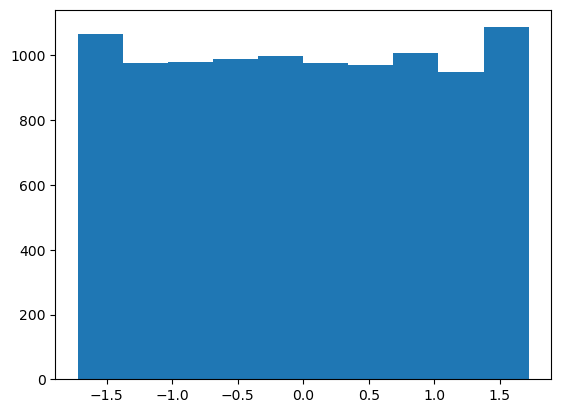

In [7]:
plt.hist(df['z_score_age'])

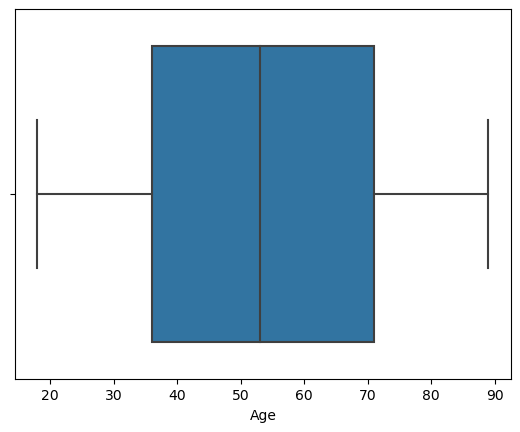

In [8]:
boxplot=sns.boxplot(x='Age',data=df)

In [9]:
# Detecting outliers via z-scores for Doc_visits variable
# No outliers present
df['z_score_doc_visits']=stats.zscore(df['Doc_visits'])
df[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

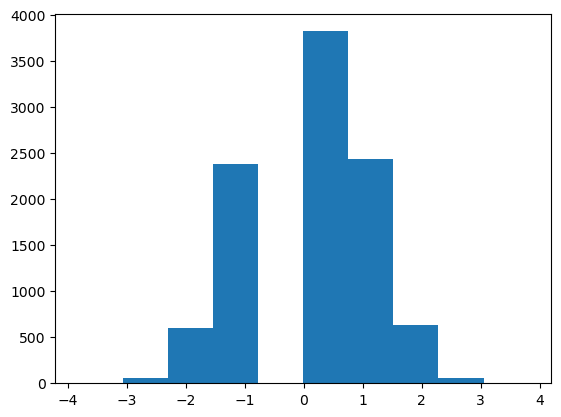

In [10]:
plt.hist(df['z_score_doc_visits'])

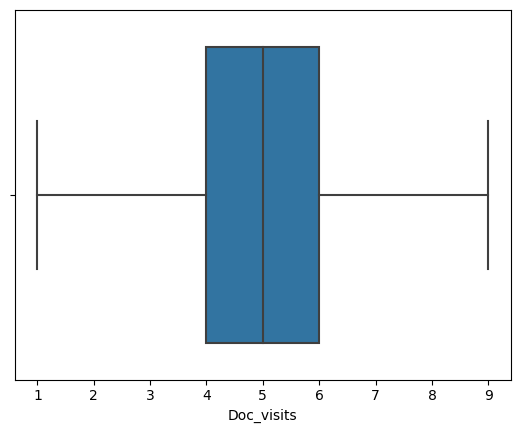

In [11]:
boxplot=sns.boxplot(x='Doc_visits',data=df)

In [12]:
# Detecting outliers for VitD_levels variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_vitd']=stats.zscore(df['VitD_levels'])
df[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       19.141466      0.583603
1       18.940352      0.483901
2       18.057507      0.046227
3       16.576858     -0.687811
4       17.439069     -0.260366
...           ...           ...
9995    16.980860     -0.487525
9996    18.177020      0.105476
9997    17.129070     -0.414049
9998    19.910430      0.964820
9999    18.388620      0.210377

[10000 rows x 2 columns]>

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([-4.04424997, -3.22189522, -2.39954048, -1.57718573, -0.75483099,
         0.06752375,  0.8898785 ,  1.71223324,  2.53458799,  3.35694273,
         4.17929747]),
 <BarContainer object of 10 artists>)

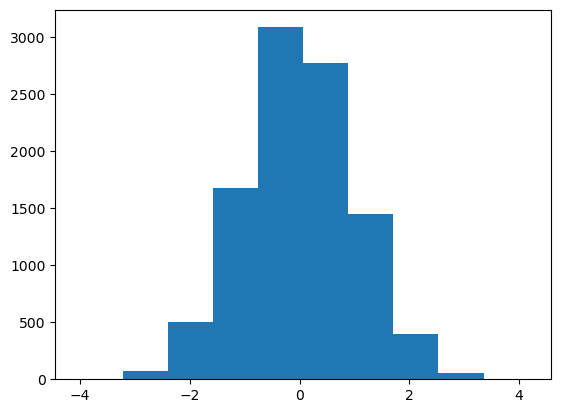

In [13]:
plt.hist(df['z_score_vitd'])

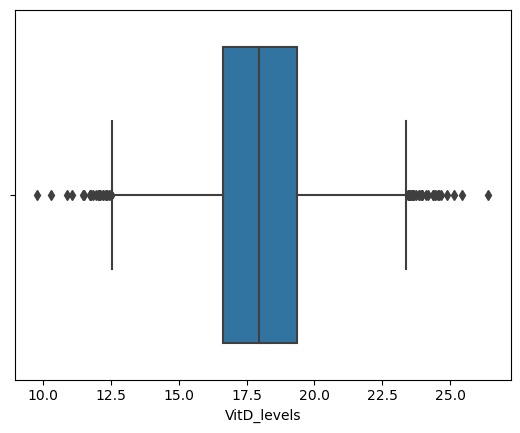

In [14]:
boxplot=sns.boxplot(x='VitD_levels',data=df)

In [15]:
# Detecting outliers for VitD_supp variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_vitd_supp']=stats.zscore(df['vitD_supp'])
df[['vitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       vitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

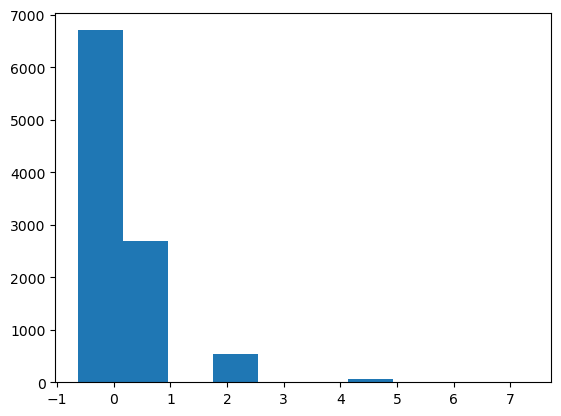

In [16]:
plt.hist(df['z_score_vitd_supp'])

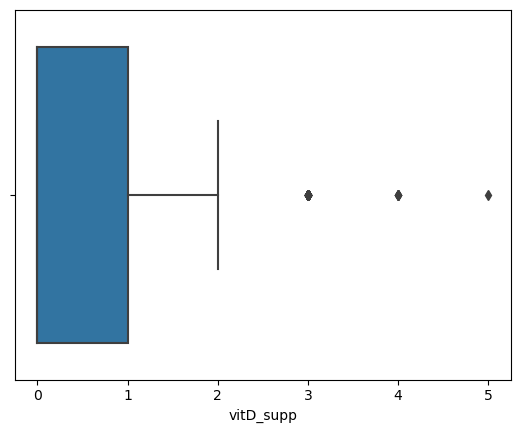

In [17]:
boxplot=sns.boxplot(x='vitD_supp',data=df)

In [18]:
# Detecting outliers for Full_meals_eaten variable
# Minor outliers are present and will be retained since not outside realm of possibility
df['z_score_meals']=stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

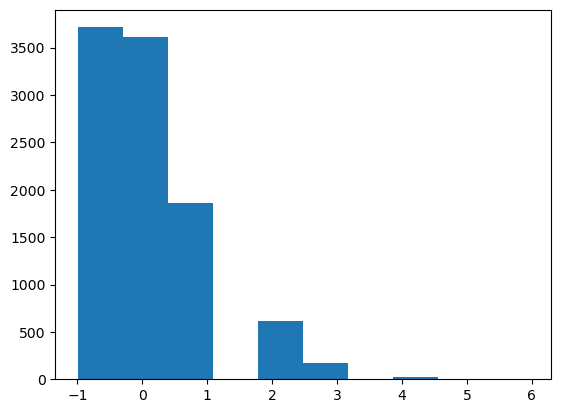

In [19]:
plt.hist(df['z_score_meals'])

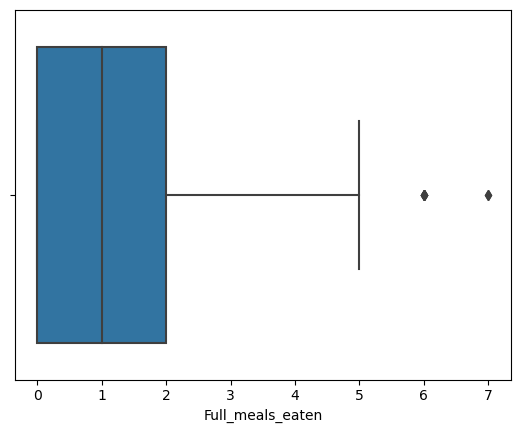

In [20]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=df)

### Re-Expression of Categorical Variables

In [21]:
# Mapping bools
bool_mapping = {"Yes": 1, "No": 0}

# HighBlood variable
df["HighBlood"] = df["HighBlood"].map(bool_mapping)

# Overweight variable
df["Overweight"] = df["Overweight"].map(bool_mapping)

# Anxiety variable
df["Anxiety"] = df["Anxiety"].map(bool_mapping)

# Reflux_esophagitis variable
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)

# BackPain variable
df["BackPain"] = df["BackPain"].map(bool_mapping)

# Hyperlipidemia variable
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)

# Stroke variable
df["Stroke"] = df["Stroke"].map(bool_mapping)

# Arthritis variable
df["Arthritis"] = df["Arthritis"].map(bool_mapping)

In [22]:
knn_df = df[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis']]

### Scaling the Data (Source: D209 Cohort)

In [23]:
# Separate the X variables (explanatory) from the Y variable (response) into different dataframes
df_X = knn_df.drop(["HighBlood"], axis=1).copy()
df_y = knn_df["HighBlood"].copy()

In [24]:
# Standardize the X variables (explanatory) to put all on the same scale for KNN to measure distance
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
df_X

,Age,Doc_visits,VitD_levels,vitD_supp,Full_meals_eaten,Overweight,Anxiety,Reflux_esophagitis,BackPain,Hyperlipidemia,Stroke,Arthritis
0,0.492958,0.625,0.562756,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.464789,0.375,0.550632,0.2,0.285714,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.492958,0.375,0.497410,0.0,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.845070,0.375,0.408150,0.0,0.142857,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.056338,0.500,0.460128,0.4,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.098592,0.375,0.432505,0.2,0.285714,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9996,0.971831,0.500,0.504615,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,0.380282,0.375,0.441440,0.0,0.285714,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.352113,0.500,0.609113,0.2,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_y

0       1
1       1
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: HighBlood, Length: 10000, dtype: int64

In [26]:
# Use SelectKBest to determine the best features to include in the model
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'Feature' : df_X.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals [feat_pvals['p_value'] < 0.15]

,Feature,p_value
5,Overweight,0.008711
4,Full_meals_eaten,0.139316


In [27]:
# Check VIF for multicollinearity
X = df[["Overweight", "Full_meals_eaten"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

# No VIF above 10

            feature       VIF
0        Overweight  1.535141
1  Full_meals_eaten  1.535141


### Summary Statistics (Source: D208 Webinars)

- High Blood Pressure. This is our categorical dependent/target variable. Here, we can see that 59% of patients do not have high blood pressure.

In [28]:
df['HighBlood'].value_counts()

0    5910
1    4090
Name: HighBlood, dtype: int64

- Age. This is one of our quantitative independent variables. Here, we can see that the average age of patients is 53.5 years old with the maximum being 89 years old.

In [29]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

- Doctor Visits. This is one of our quantitative independent variables. Here, we can see that the average number of doctor visits a patient receives during hospitalization is 5 with the maximum being 9.

In [30]:
df['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

- Vitamin D Levels. This is one of our quantitative independent variables. Here, we can see that the average vitamin d level is nearly 18 with the maximum being near 26. As discussed previously in my D206 PA, these values are within a normal range medically speaking.

In [31]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

- Vitamin D Supplements. This is one of our quantitative independent variables. Here, we can see that the average number of vitamin d supplements a patient receives is 0.39 with the maximum being 5.

In [32]:
df['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

- Full Meals Eaten. This is one of our quantitative independent variables. Here, we can see that the average number of meals eaten during hospitalization is 1 with the maximum being 7. Please note that this variable only constitutes full meals eaten and does not include partially eaten meals.

In [33]:
df['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

- Overweight. This is one of our categorical independent variables. Here, we can see that nearly 71% of patients are overweight.

In [34]:
df['Overweight'].value_counts()

1    7094
0    2906
Name: Overweight, dtype: int64

- Anxiety. This is one of our categorical independent variables. Here, we can see that almost 68% of patients do not have anxiety.

In [35]:
df['Anxiety'].value_counts()

0    6785
1    3215
Name: Anxiety, dtype: int64

- Reflux Esophagitis. This is one of our categorical independent variables. Here, we can see that approximately 59% of patients do not have reflux esophagitis.

In [36]:
df['Reflux_esophagitis'].value_counts()

0    5865
1    4135
Name: Reflux_esophagitis, dtype: int64

- Back Pain. This is one of our categorical independent variables. Here, we can see that approximately 59% of patients do not have back pain.

In [37]:
df['BackPain'].value_counts()

0    5886
1    4114
Name: BackPain, dtype: int64

- Hyperlipidemia. This is one of our categorical independent variables. Here, we can see that 66% of patients do not have hyperlipidemia.

In [38]:
df['Hyperlipidemia'].value_counts()

0    6628
1    3372
Name: Hyperlipidemia, dtype: int64

- Stroke. This is one of our categorical independent variables. Here, we can see that 80% of patients have not had a stroke.

In [39]:
df['Stroke'].value_counts()

0    8007
1    1993
Name: Stroke, dtype: int64

- Arthritis. This is one of our categorical independent variables. Here, we can see that 64% of patients do not have arthritis.

In [40]:
df['Arthritis'].value_counts()

0    6426
1    3574
Name: Arthritis, dtype: int64

### Univariate and Bivariate Visualizations

(array([5910.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

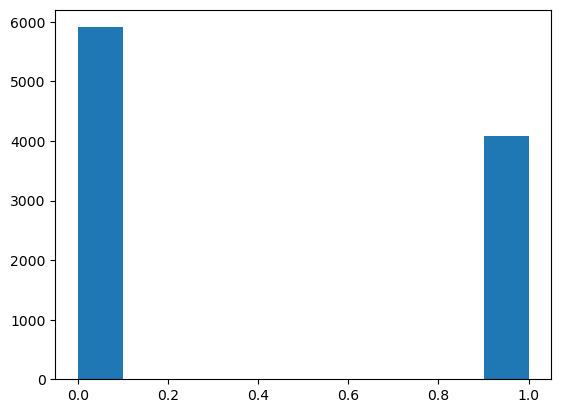

In [41]:
plt.hist(df['HighBlood'])

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

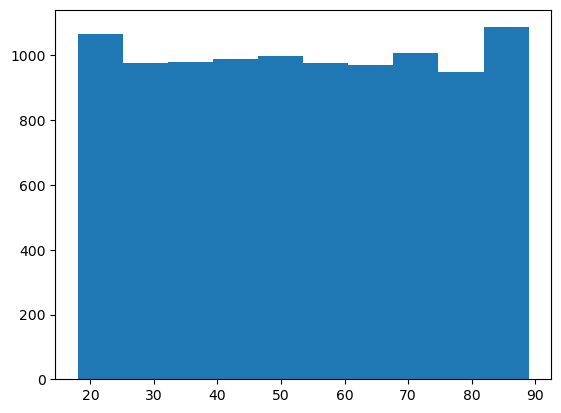

In [42]:
plt.hist(df['Age'])

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

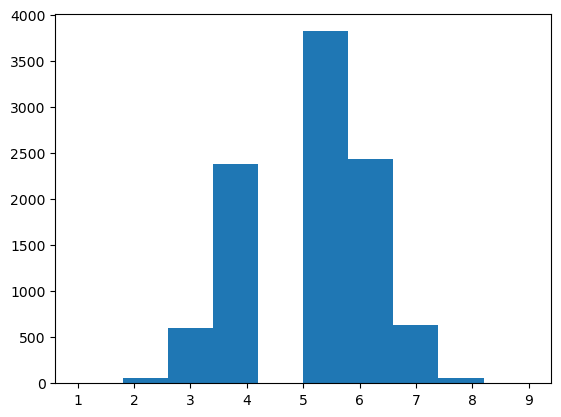

In [43]:
plt.hist(df['Doc_visits'])

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([ 9.806483  , 11.46527957, 13.12407614, 14.78287271, 16.44166928,
        18.10046585, 19.75926243, 21.418059  , 23.07685557, 24.73565214,
        26.39444871]),
 <BarContainer object of 10 artists>)

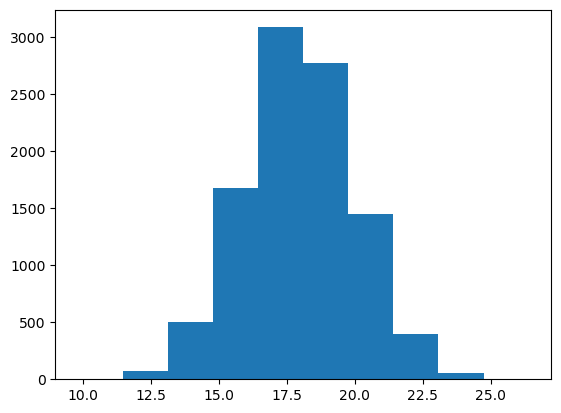

In [44]:
plt.hist(df['VitD_levels'])

(array([6.702e+03, 0.000e+00, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

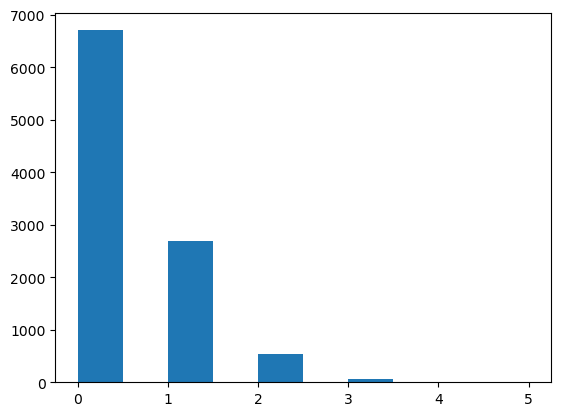

In [45]:
plt.hist(df['vitD_supp'])

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

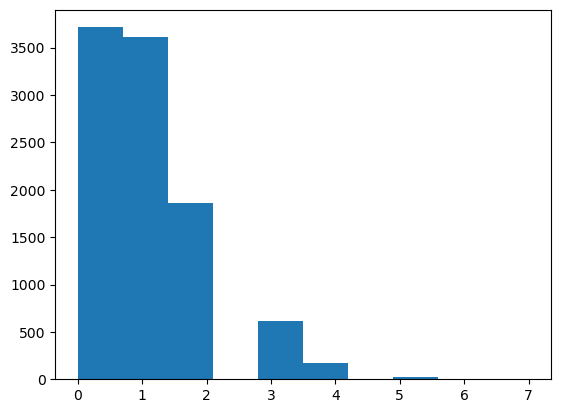

In [46]:
plt.hist(df['Full_meals_eaten'])

(array([2906.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

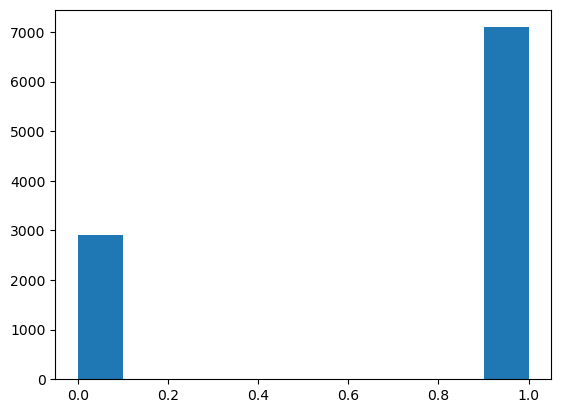

In [47]:
plt.hist(df['Overweight'])

(array([6785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

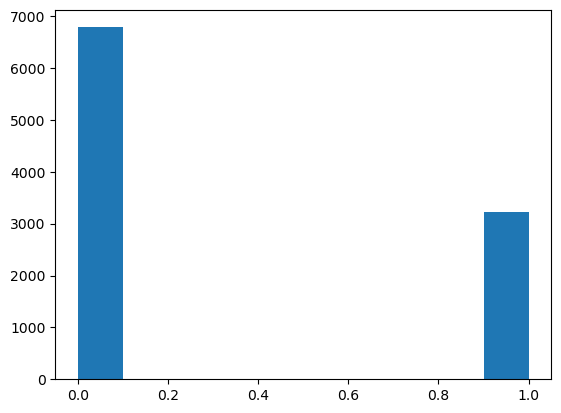

In [48]:
plt.hist(df['Anxiety'])

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

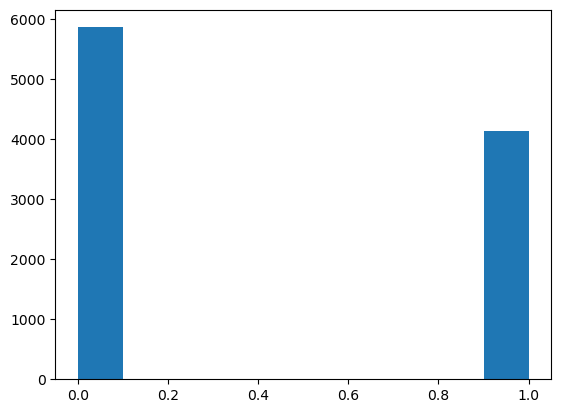

In [49]:
plt.hist(df['Reflux_esophagitis'])

(array([5886.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

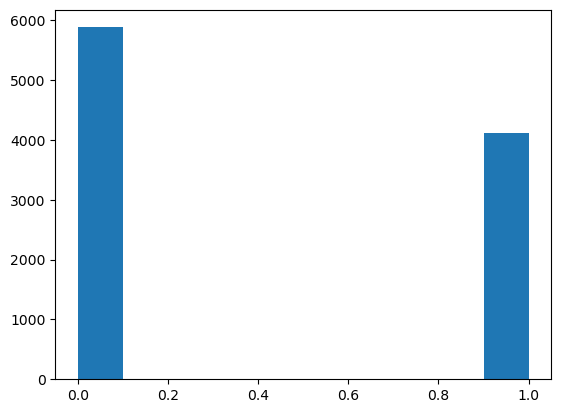

In [50]:
plt.hist(df['BackPain'])

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

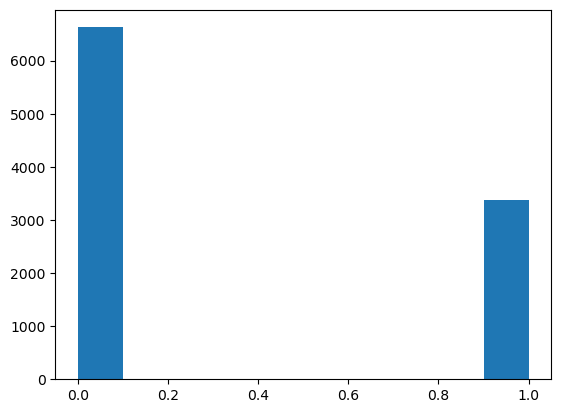

In [51]:
plt.hist(df['Hyperlipidemia'])

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

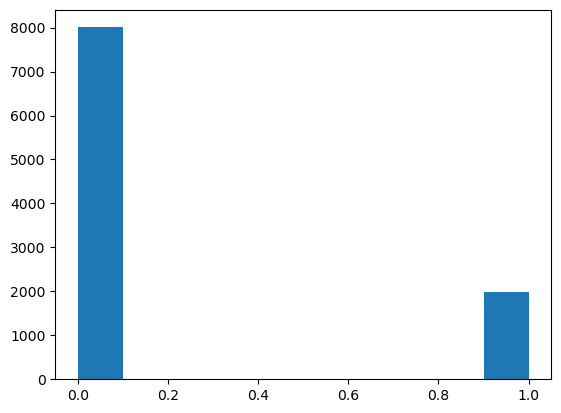

In [52]:
plt.hist(df['Stroke'])

(array([6426.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

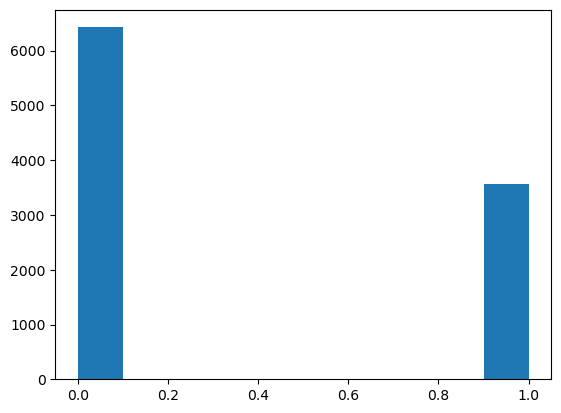

In [53]:
plt.hist(df['Arthritis'])

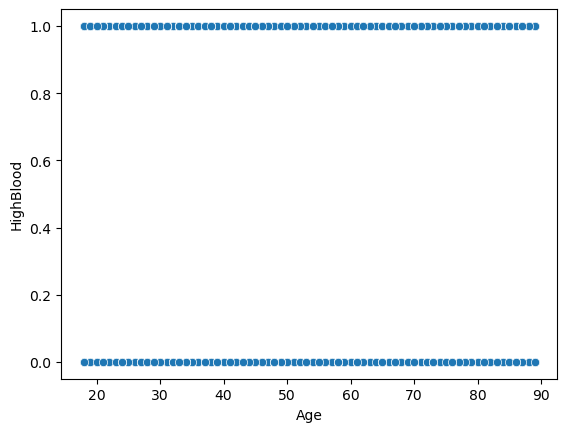

In [54]:
# HighBlood and Age
sns.scatterplot(x=df['Age'], y=df['HighBlood'])
plt.show();

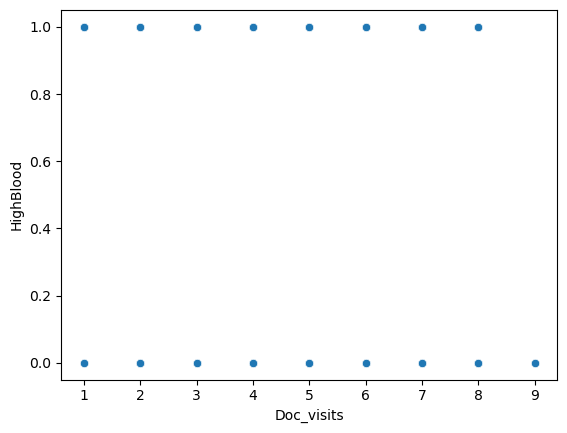

In [55]:
# HighBlood and Doctor Visits
sns.scatterplot(x=df['Doc_visits'], y=df['HighBlood'])
plt.show();

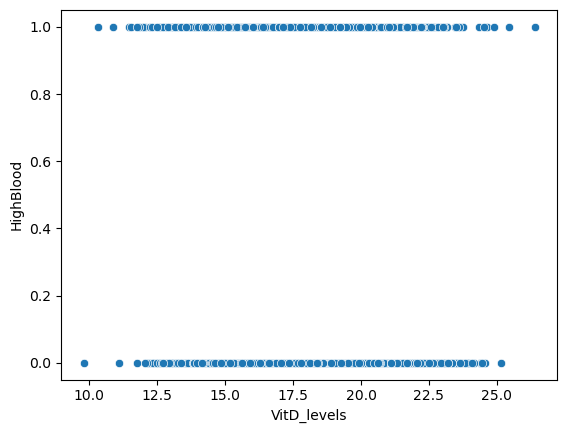

In [56]:
# HighBlood and Vitamin D Levels
sns.scatterplot(x=df['VitD_levels'], y=df['HighBlood'])
plt.show();

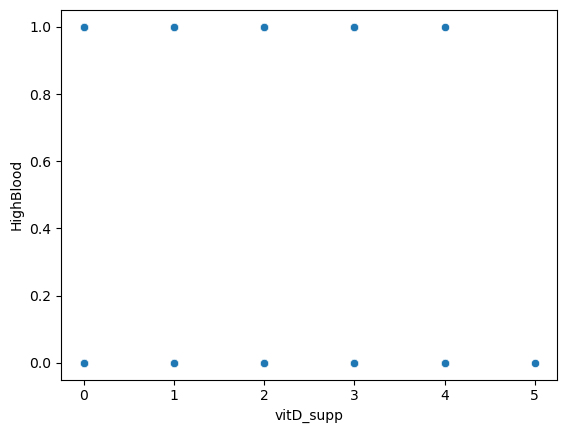

In [57]:
# HighBlood and Vitamin D Supplements
sns.scatterplot(x=df['vitD_supp'], y=df['HighBlood'])
plt.show();

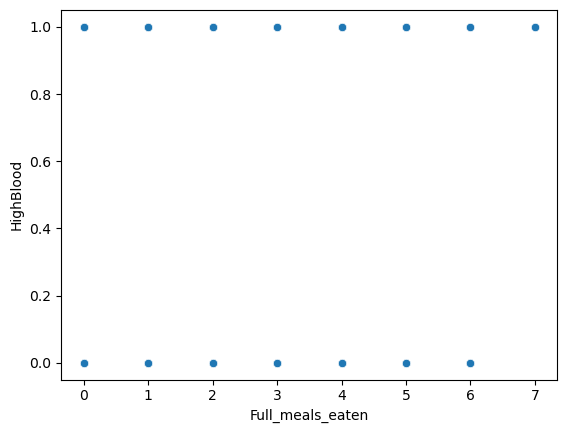

In [58]:
# HighBlood and Full Meals Eaten
sns.scatterplot(x=df['Full_meals_eaten'], y=df['HighBlood'])
plt.show();

In [59]:
# HighBlood and Overweight
contingency= pd.crosstab(df['Overweight'], df['HighBlood'])
contingency

HighBlood,0,1
Overweight,,
0,1776,1130
1,4134,2960


<Axes: xlabel='HighBlood', ylabel='Overweight'>

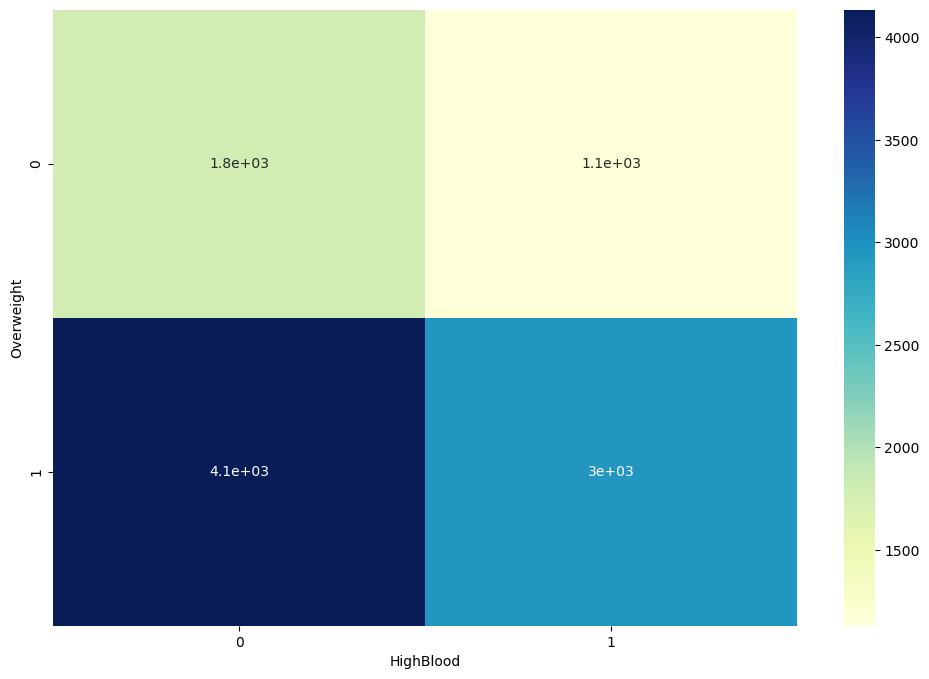

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [61]:
# HighBlood and Anxiety
contingency= pd.crosstab(df['Anxiety'], df['HighBlood'])
contingency

HighBlood,0,1
Anxiety,,
0,4029,2756
1,1881,1334


<Axes: xlabel='HighBlood', ylabel='Anxiety'>

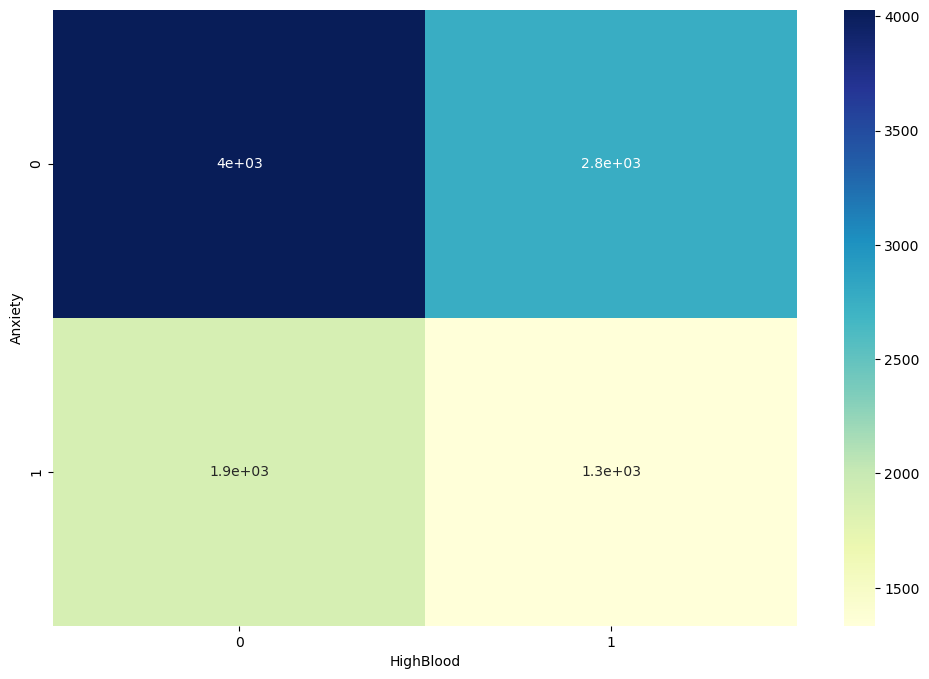

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [63]:
# HighBlood and Reflux Esophagitis
contingency= pd.crosstab(df['Reflux_esophagitis'], df['HighBlood'])
contingency

HighBlood,0,1
Reflux_esophagitis,,
0,3469,2396
1,2441,1694


<Axes: xlabel='HighBlood', ylabel='Reflux_esophagitis'>

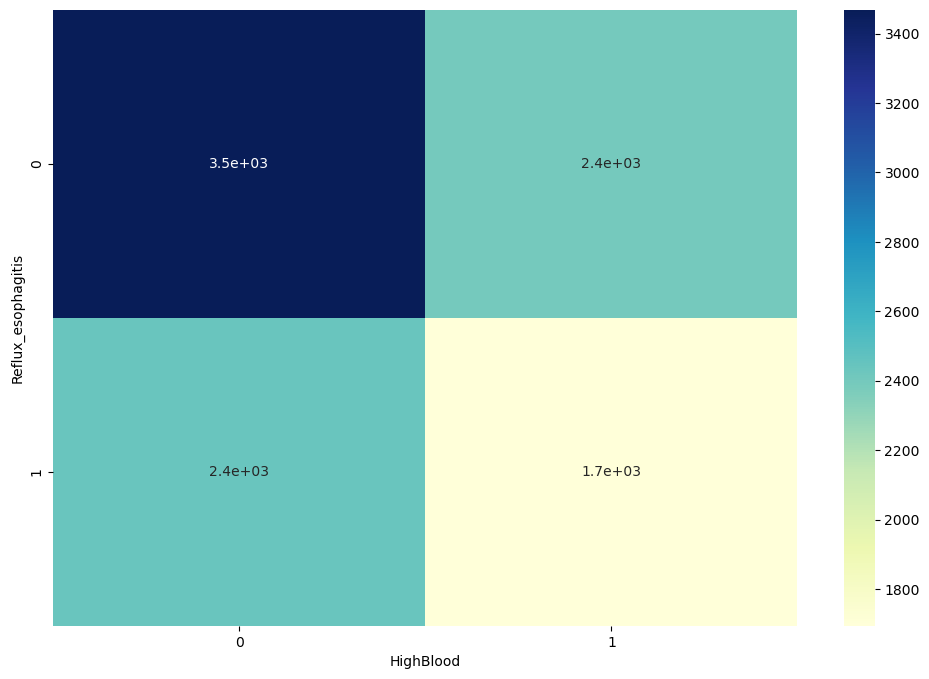

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [65]:
# HighBlood and Back Pain
contingency= pd.crosstab(df['BackPain'], df['HighBlood'])
contingency

HighBlood,0,1
BackPain,,
0,3486,2400
1,2424,1690


<Axes: xlabel='HighBlood', ylabel='BackPain'>

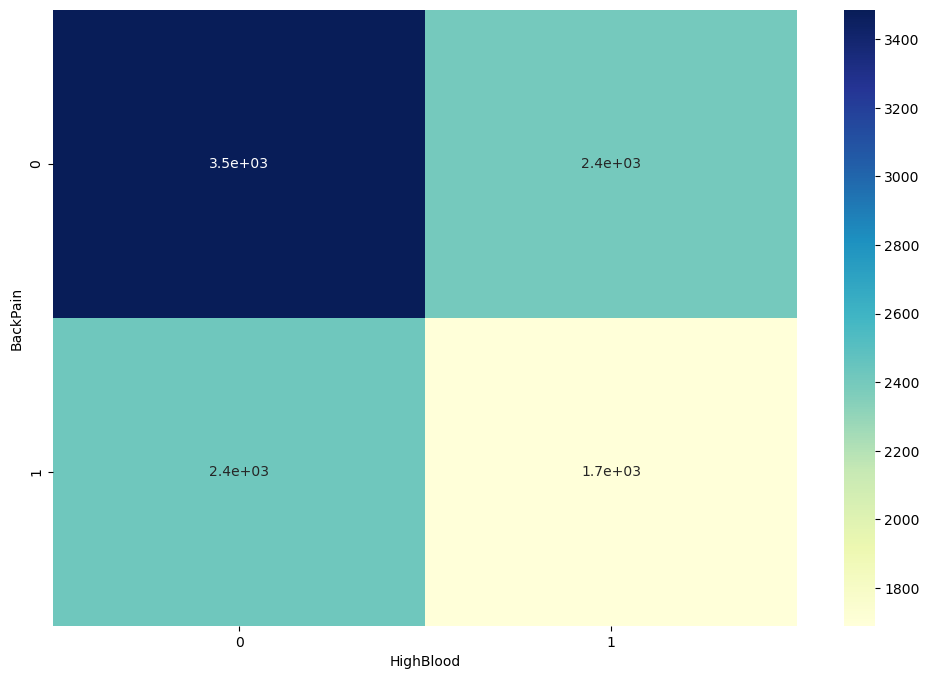

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [67]:
# HighBlood and Hyperlipidemia
contingency= pd.crosstab(df['Hyperlipidemia'], df['HighBlood'])
contingency

HighBlood,0,1
Hyperlipidemia,,
0,3895,2733
1,2015,1357


<Axes: xlabel='HighBlood', ylabel='Hyperlipidemia'>

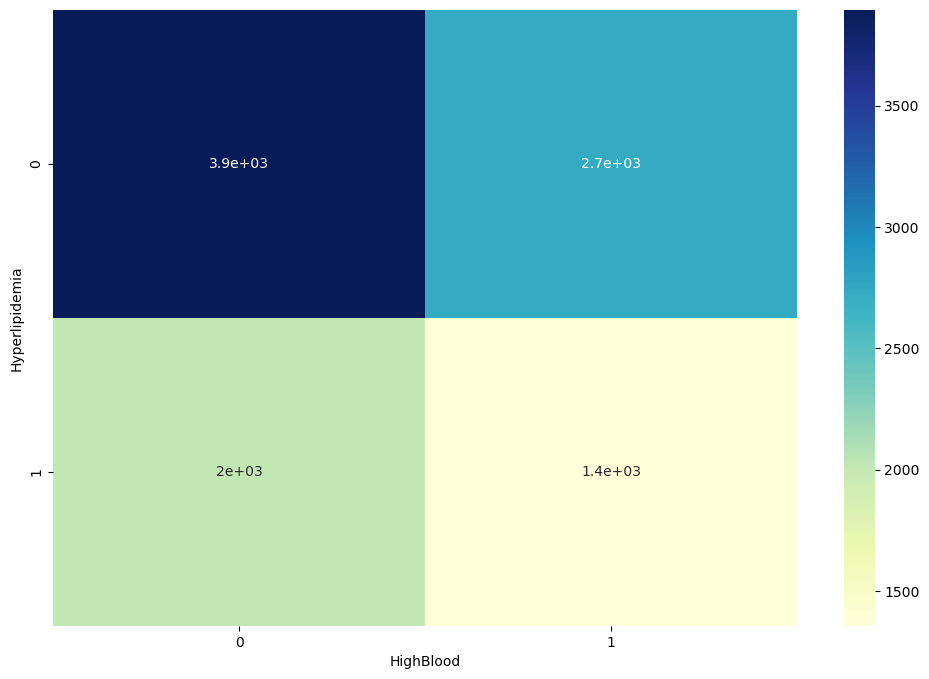

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [69]:
# HighBlood and Stroke
contingency= pd.crosstab(df['Stroke'], df['HighBlood'])
contingency

HighBlood,0,1
Stroke,,
0,4747,3260
1,1163,830


<Axes: xlabel='HighBlood', ylabel='Stroke'>

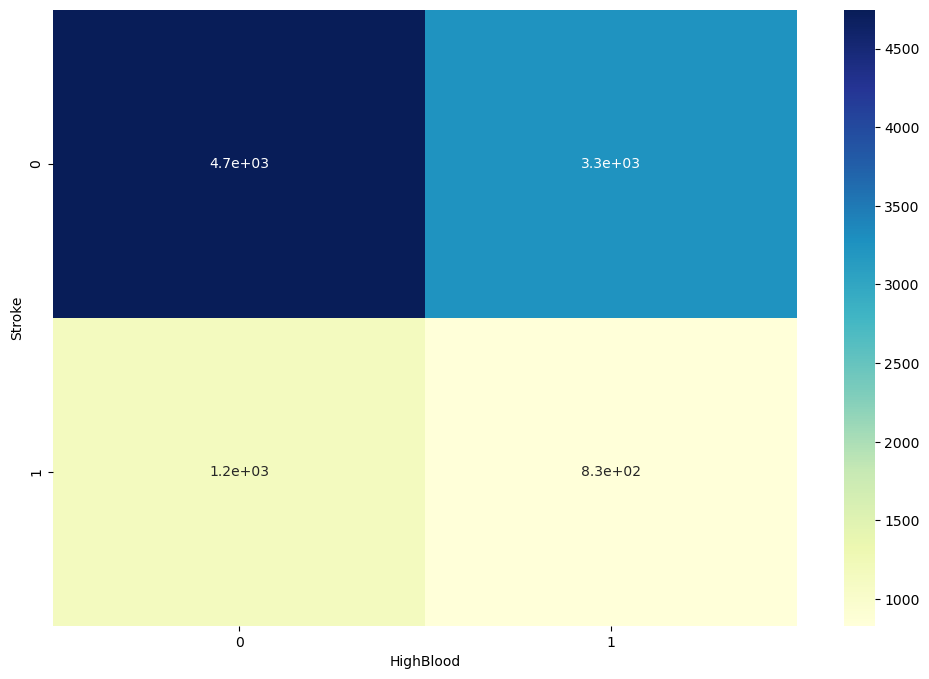

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [71]:
# HighBlood and Arthritis
contingency= pd.crosstab(df['Arthritis'], df['HighBlood'])
contingency

HighBlood,0,1
Arthritis,,
0,3815,2611
1,2095,1479


<Axes: xlabel='HighBlood', ylabel='Arthritis'>

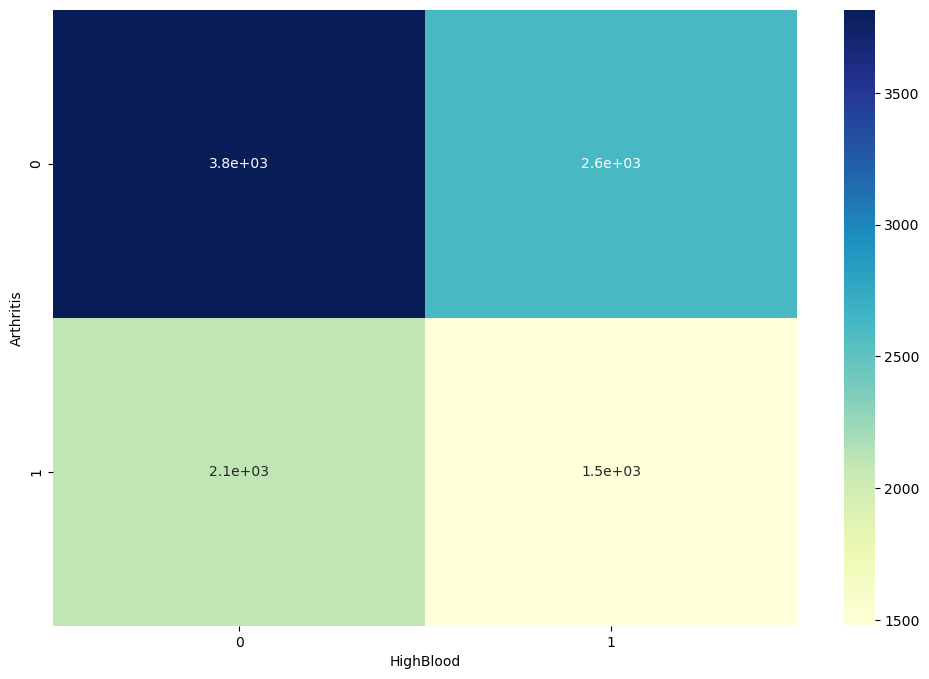

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

## C4. Prepared Dataset CSV File
Please see the copy of the cleaned dataset that is being submitted as part of this PA.

In [73]:
# Recombine df_X and df_y
df = df_X.copy()
df.insert(12, column="HighBlood", value=df_y)

# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('/Users/astro/Downloads/knn1.csv', index=False)

# PART IV: Analysis
## D1. Training and Test Datasets

In [74]:
# Set X and y
X = df_X[["Overweight", "Full_meals_eaten"]].assign(const=1)
y = df_y

# Split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

In [75]:
# Training and Test Datasets to CSV
X_train.to_csv('/Users/astro/Downloads/d209task1_Xtrain.csv', index=False)
X_test.to_csv('/Users/astro/Downloads/d209task1_Xtest.csv', index=False)
y_train.to_csv('/Users/astro/Downloads/d209task1_ytrain.csv', index=False)
y_test.to_csv('/Users/astro/Downloads/d209task1_ytest.csv', index=False)

## D2. The Analysis (Source: D209 DataCamp)

In [76]:
# Determine best number of neighbors to use for KNN classification, from values of k = 1 to k = 50
param_grid = {'n_neighbors' : np.arange(1, 50)}

# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit to training data
knn_cv.fit(X_train, y_train)

# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 48}

In [77]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.5810000000000001

The confusion matrix for this KNN model:
Predicted No High Blood | Predicted High Blood
                 [1171   11] Actual No High Blood
                 [811   7] Actual High Blood
The training accuracy of this KNN classification is 0.5905.
The testing accuracy of this KNN classification model is 0.589.


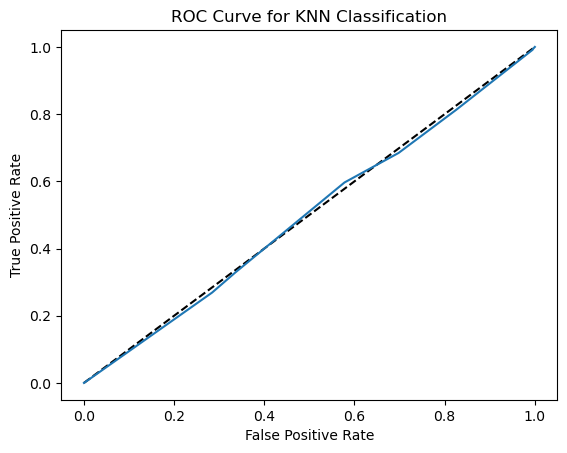

The Area Under the Curve (AUC) score is: 0.495902783810954

              precision    recall  f1-score   support

           0       0.59      0.99      0.74      1182
           1       0.39      0.01      0.02       818

    accuracy                           0.59      2000
   macro avg       0.49      0.50      0.38      2000
weighted avg       0.51      0.59      0.44      2000



In [78]:
# Perform KNN using the value of k=48 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 48)

# Fit to the training data
knn.fit(X_train, y_train)

# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No High Blood | Predicted High Blood")
print(f"                 {final_matrix[0]} Actual No High Blood")
print(f"                 {final_matrix[1]} Actual High Blood")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")

# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

## D3. Copy of Code from Classification Analysis
Please see the copy of the code used for the Classification Analysis that is being submitted as part of this PA.

# PART V: Data Summary and Implications
## E1. Accuracy and AUC
The KNN Classification Model has an accuracy of nearly 59%. This is not particularly good and is due in large part to the incidence of no high blood pressure as we can see from the results above. In other words, the model is not very precise.

The Area Under the Curve (AUC) is 49.5% which means it is under 50%, with 100% being perfect and 0% being incorrect. This is consistent with the curve that is plotted above, so we can tell that this model is slightly worse than even random classification methods.

## E2. Results and Implications
The results of the model tell us that it is slightly worse than random classification given the AUC score of 49.5%. Furthermore, the lack of precision tells us that the model is not good at predicting patients who have high blood pressure. It does appear that this model is somewhat better than the previous logistic attempt at the same research question from D208, but it is barely so. 

Overall, the implications for this model show that it is not accurate enough to be very useful.

## E3. Limitation of the Analysis
The limitation of this analysis is that the assumption of KNN is that datapoints that are similar are in close proximity to each other. It seems that according to this model, the incidence of high blood pressure is adequately random and that nearness/proximity in this case is not the most useful or best form of analysis/classification method for the research question.

## E4. Recommended Course of Action
I feel that this model was not particularly useful or helpful for answering the research question and that it points out the randomness of the incidence of high blood pressure. My recommended course of action is that it might be wise to attempt other classification models for this research question or to pursue different research questions altogether should one desire to attempt further KNN models.